In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
Data=pd.read_csv('coop2.csv')
print(Data.shape)
Data.isnull().sum()

(479, 3)


user_id    0
text       0
label      0
dtype: int64

In [7]:
Data=Data.drop_duplicates(subset=['user_id','text'])
print(Data.duplicated().sum())

0


In [8]:
#A preview of the data
Data.head()

,user_id,text,label
0,1.500000e+18,@Coopbankenya I'm very frustrated. Your schedu...,Negative
1,1.500000e+18,@mbunzy001 @Coopbankenya Dm,Irrelevant
2,1.500000e+18,@Coopbankenya Done,Irrelevant
3,1.500000e+18,@Coopbankenya having inboxed my issue and gott...,Negative
4,1.500000e+18,@CynthiaTheuri @Coopbankenya contact @AgentFem...,Irrelevant


## Pre-processing :
1. To remove @username and other mentions within the tweets
2. To remove punctuations and other special characters
3. To remove links within tweets

In [9]:
clean_tweets=[]
for tweet in Data.text:
    tweet=re.sub("@[A-Za-z0-9]+", repl=' ',string=tweet)#removes @username/mentions
    tweet=re.sub('[^a-zA-Z]', repl=' ',string=tweet)#removes punctuations + special chars
    tweet=re.sub('(?:(https|http)\s?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)* ',repl=' ',string=tweet)#removes links
    clean_tweets.append(tweet)
    
Data['text']=pd.Series(clean_tweets)

In [12]:
by_sentiment=pd.DataFrame(Data.groupby('label',as_index=False).agg({'text':pd.Series.count})).sort_values('text',ascending=False)
print(by_sentiment)

        label  text
1  Irrelevant   159
2    Negative   159
4     Request    53
0     Inquiry    31
3    Positive    10
5  Suggestion     1


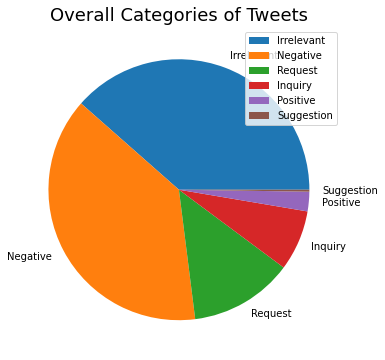

In [13]:
#To visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
plt.title('Overall Categories of Tweets',fontsize=18)
plt.pie(by_sentiment['text'],labels=by_sentiment['label'])
plt.legend()
plt.show()

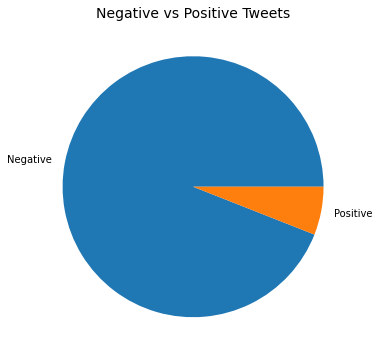

In [14]:
pos_vs_neg=pd.DataFrame({'Sentiment':['Negative','Positive'],'Count':[173,11]})

#Negative vs Positive sentiments
plt.figure(figsize=(6,6))
plt.title('Negative vs Positive Tweets',fontsize=14)
plt.pie(pos_vs_neg['Count'],labels=pos_vs_neg['Sentiment'])
plt.show()